
## **칼만 필터(Kalman Filter)의 이론과 작동 원리**

칼만 필터는 **선형 역학 시스템**에서 **측정된 값**과 **시스템 모델**을 이용하여 **최적의 상태 추정값**을 계산하는 알고리즘입니다. 특히, **실시간 데이터**가 주어졌을 때 **잡음을 포함한 데이터**를 필터링하여 정확한 상태를 추정하는 데 매우 유용합니다. 칼만 필터는 주로 **신호 처리**, **로봇 제어**, **항공기 추적**, **경제 데이터 분석** 등에서 널리 사용됩니다.


 **1.** **알고리즘 단계**


 **1.1.** **초기화 (Initialization)**

-  칼만 필터를 적용하기 전에 상태 벡터와 오차 공분산 행렬을 초기화합니다. 시스템에 대한 사전 정보가 있으면 이를 활용해 초기 값을 설정합니다.
-  초기화할 주요 값:
-   **상태 벡터** ${\hat{x} }_0$ : 시스템의 초기 상태.
-   **오차 공분산 행렬** $P_0$ **​**: 초기 추정 상태의 불확실성.

 **1.2.** **예측 과정 (Prediction Step)**

-  현재 시간 $k$ 의 상태를 기반으로, 다음 시간 $k+1$ 의 상태를 예측합니다. 이 과정에서 시스템 모델과 오차 공분산을 이용해 상태를 업데이트합니다.예측 단계는 두 가지로 구성됩니다.
-  **상태 예측**: 시스템 모델 행렬 $A$ 와 입력 벡터 $u$ 를 통해 다음 상태를 예측합니다.

 ${\hat{x} }_{k+1|k} =A{\hat{x} }_k +Bu_k$ ​

-  **오차 공분산 예측**: 상태 오차 공분산 행렬 PPP를 예측하는 단계로, 예측 과정에서 생길 불확실성을 반영합니다.

$$P_{k+1|k} =AP_k A^T +Q$$

-  여기서 $Q$ 는 시스템 잡음의 공분산을 나타냅니다.

**1.3. 칼만 이득 계산 (Kalman Gain Calculation)**

-  예측값과 측정값을 적절히 결합하기 위해 \*\*칼만 이득 $K_k$ ​\*\*을 계산합니다. 칼만 이득은 예측값과 측정값의 신뢰도를 조정하는 역할을 합니다. 측정값의 신뢰도가 높다면 이득이 커지고, 예측값의 신뢰도가 높다면 이득이 작아집니다.

 $K_k =\frac{P_{k+1|k} H^T }{HP_{k+1|k} H^T +R}$ ​

-  $H$ : 측정 행렬 (상태 벡터를 측정값으로 변환하는 행렬).
-  $R$ : 측정 잡음 공분산.

 **1.4.** **추정 과정 (Correction/Update Step)**

-  새로운 측정값 $z_k$ ​을 통해 상태를 업데이트하는 과정입니다. 예측한 상태 벡터에 칼만 이득과 실제 측정값을 반영하여 상태를 보정합니다.

$${\hat{x} }_{k+1} ={\hat{x} }_{k+1|k} +K_k (z_k -H{\hat{x} }_{k+1|k} )$$

-  이 과정에서 $(z_k -H{\hat{x} }_{k+1|k} )$ 는 예측 오차 (또는 잔차, residual)입니다. 이를 통해 측정값과 예측값의 차이를 보정합니다.

**1.5. 오차 공분산 갱신 (Covariance Update)**

-  상태 업데이트 후 오차 공분산 행렬도 업데이트합니다. 이 단계는 상태 추정의 신뢰도를 계산합니다.

 $P_{k+1} =(I-K_k H)P_{k+1|k}$ ​


**2. 핵심 개념 및 변수 설명** **2.1.**  **상태 벡터** ${\hat{x} }_k$ **​**

-  시스템의 현재 상태를 나타내는 벡터입니다. 시간에 따라 변화하는 시스템의 상태를 나타내며, 측정값을 포함하지 않고, 모델링된 시스템 변수를 포함합니다. 예를 들어, 위치나 속도 등을 포함할 수 있습니다.

 **2.2.**  **측정 벡터** $z_k$ **​**

-  실제로 관측된 데이터입니다. 보통 잡음이 포함된 데이터로, 측정 오차가 있을 수 있습니다. 측정값을 통해 시스템의 상태를 보정할 수 있습니다.

 **2.3.**  **시스템 모델 행렬** $A$

-  시스템의 동작 방식을 정의하는 행렬입니다. 상태 벡터가 시간에 따라 어떻게 변화하는지를 나타냅니다. 시스템이 선형일 경우에는 고정된 $A$ 행렬로 표현할 수 있지만, 비선형 시스템에서는 시간에 따라 달라질 수 있습니다.

 **2.4.**  **측정 행렬** HH**H**

-  측정된 데이터를 상태 공간에 매핑하는 행렬입니다. HHH는 측정값을 상태 벡터로 변환하는 역할을 하며, 상태 벡터의 특정 부분만 측정값으로 변환하는 경우가 많습니다.

 **2.5.**  **칼만 이득** $K_k$ **​**

-  예측값과 측정값을 결합할 때 어느 쪽을 더 신뢰할지를 결정하는 가중치입니다. 칼만 이득이 크면 측정값을 더 신뢰하고, 작으면 예측값을 더 신뢰합니다. 이는 예측 불확실성과 측정 불확실성에 따라 동적으로 변화합니다.

 **2.6.**  **오차 공분산 행렬** $P_k$ **​**

-  상태 추정의 불확실성을 나타내는 행렬입니다. 이 값이 크면 상태 추정의 신뢰도가 낮고, 작으면 신뢰도가 높습니다. 예측과 측정 과정에서 오차 공분산은 매번 업데이트됩니다.

 **2.7.**  **시스템 잡음 공분산** $Q$

-  시스템 모델에 의한 잡음을 나타냅니다. 시스템 자체의 불확실성 또는 외부 환경에서 발생하는 예측 오차를 모델링하는 데 사용됩니다.

 **2.8.**  **측정 잡음 공분산** $R$

-  측정값에 포함된 잡음을 나타냅니다. 센서 오차 또는 측정 장치의 정확도를 반영합니다.

 **3.** **칼만 필터의 계산과정 요약**

-  **초기화**: 상태 벡터 ${\hat{x} }_0$ ​와 오차 공분산 $P_0$ ​ 설정.
-  **예측**:

$${\hat{x} }_{k+1|k} =A{\hat{x} }_k +Bu_k$$

$$P_{k+1|k} =AP_k A^T +Q$$

-  **칼만 이득 계산**:

 $K_k =\frac{P_{k+1|k} H^T }{HP_{k+1|k} H^T +R}$ ​

-  **상태 보정**:

$${\hat{x} }_{k+1} ={\hat{x} }_{k+1|k} +K_k (z_k -H{\hat{x} }_{k+1|k} )$$

-  **오차 공분산 업데이트**:

$$P_{k+1} =(I-K_k H)P_{k+1|k}$$
#### **신호 처리의 구체적 사례: 잡음 제거**

가정:

-  실제 신호는 $y=\sin (0.1\cdot t)$ 형태의 사인파입니다.
-  이 신호에 랜덤 노이즈가 추가되었고, 이를 칼만 필터로 제거하여 깨끗한 신호를 추정합니다.​


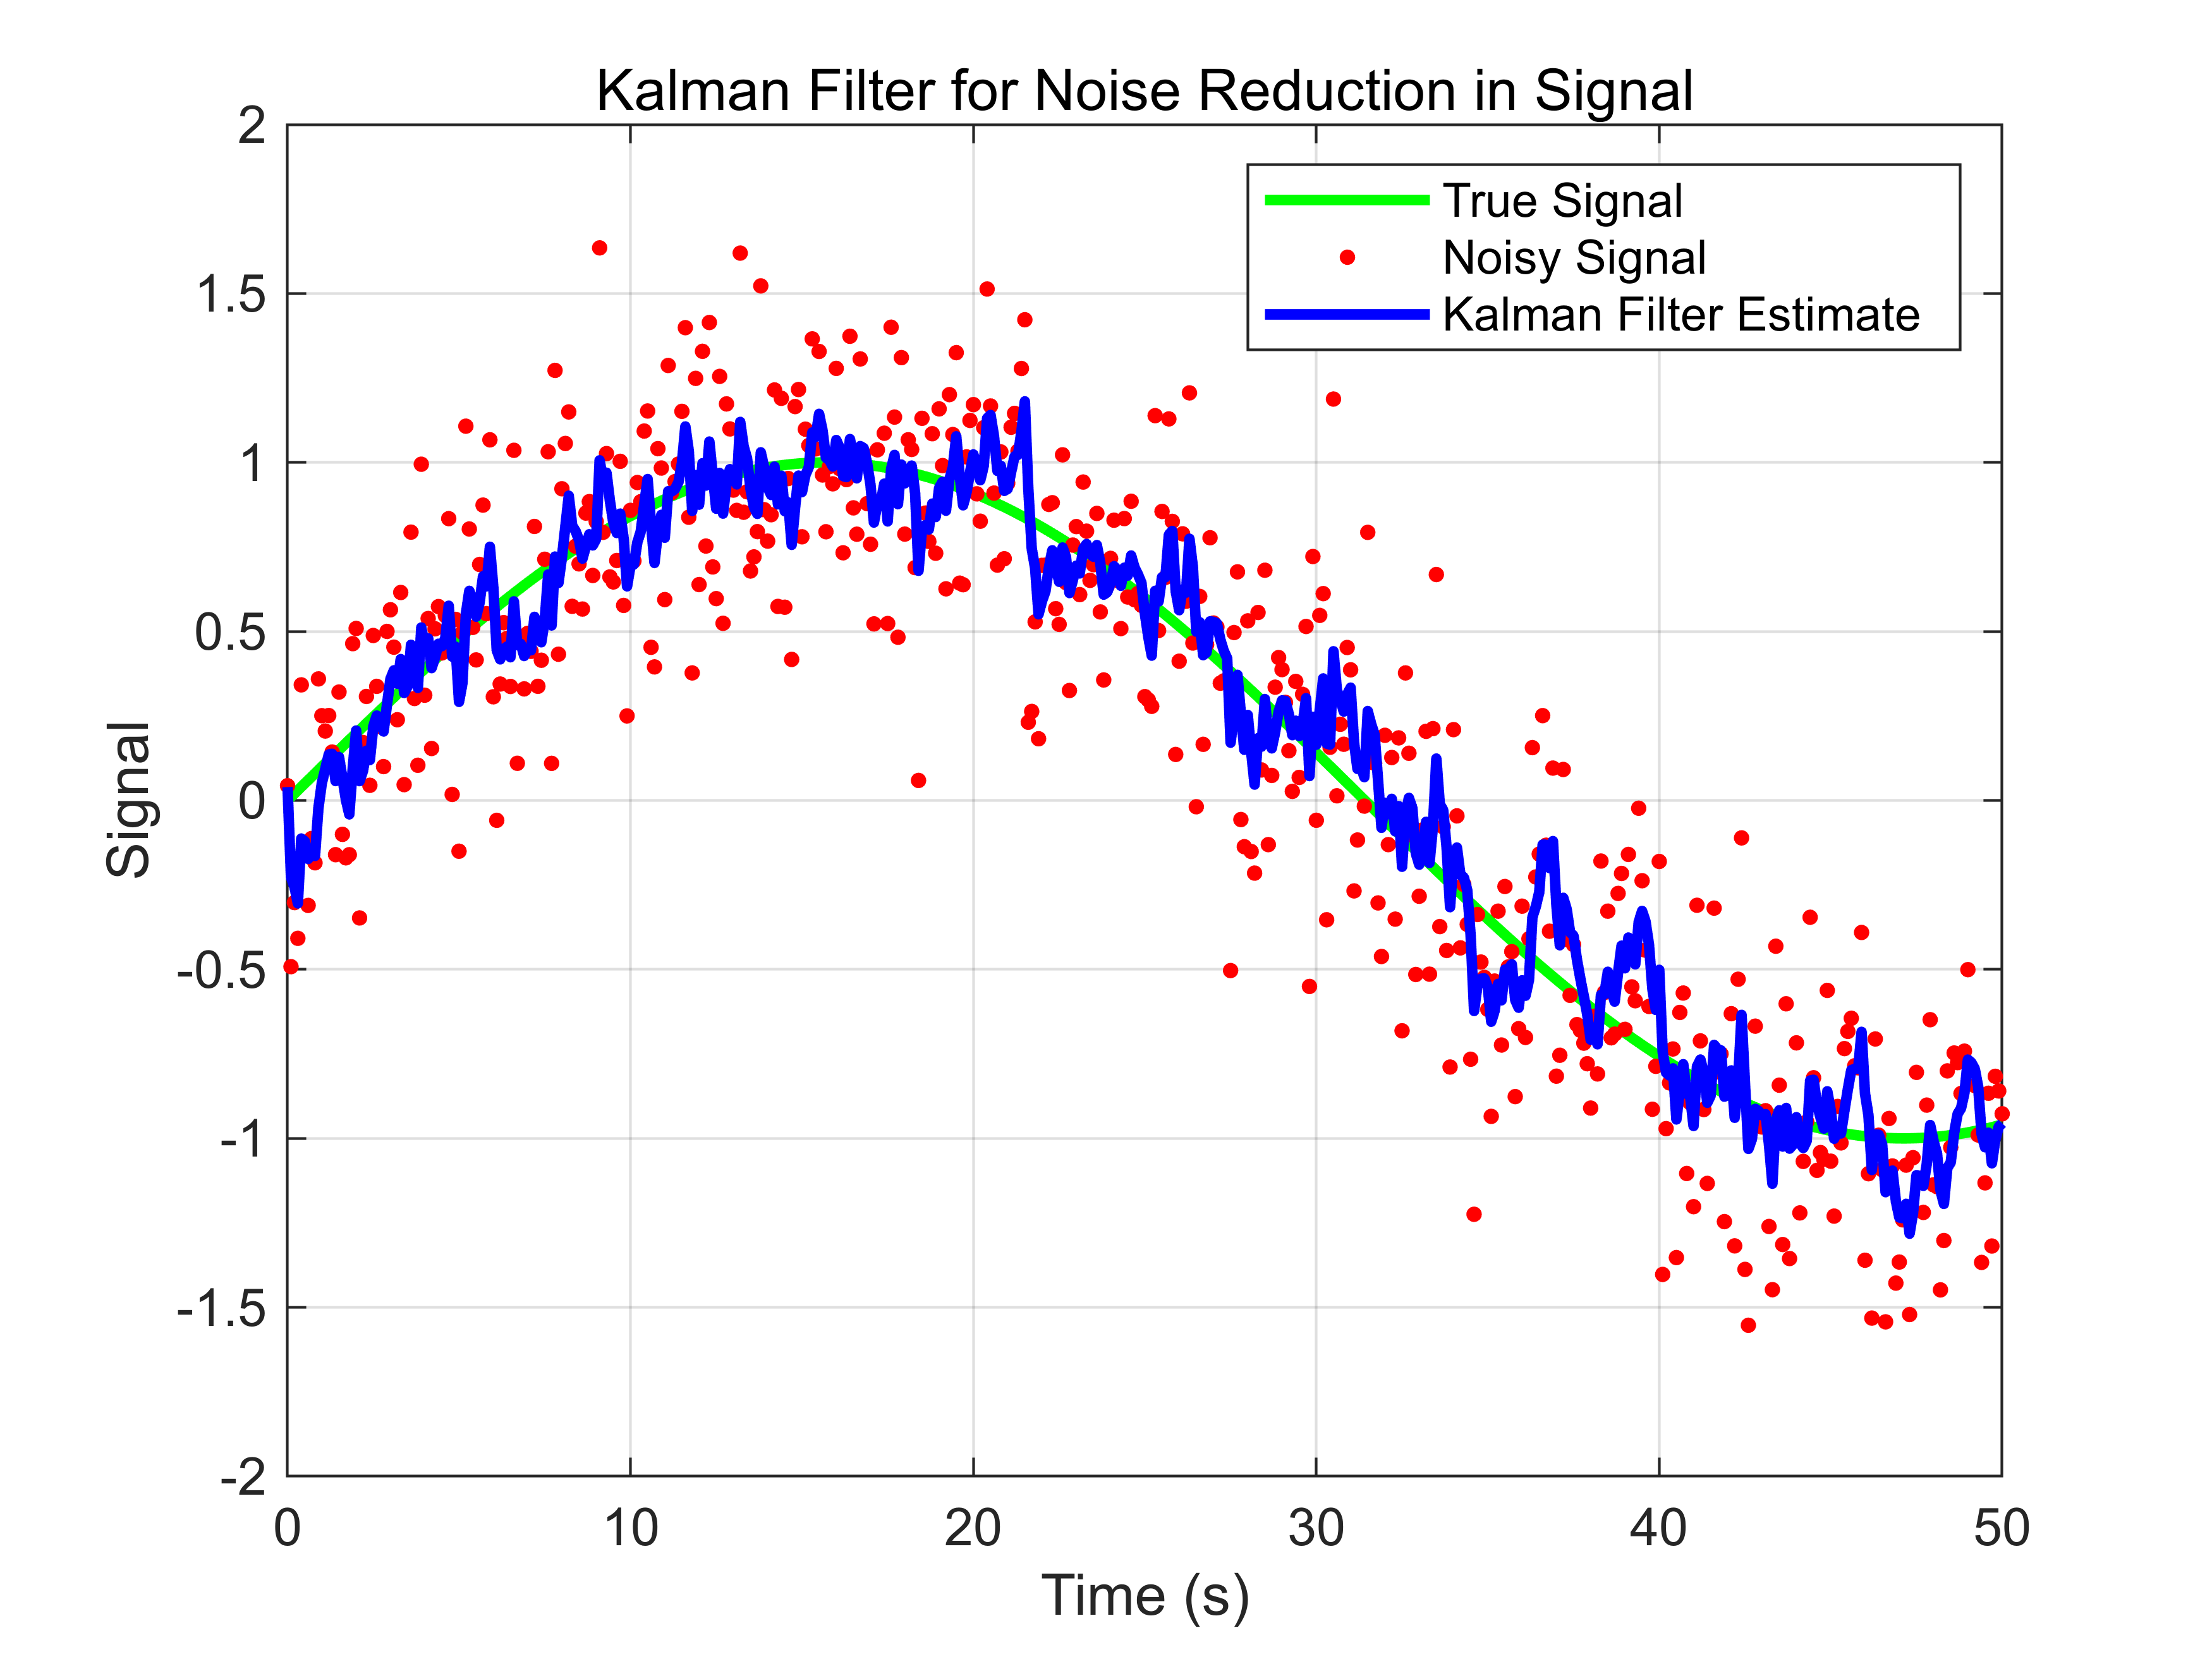

In [1]:
% Parameters
dt = 0.1;                % Time step
t = 0:dt:50;             % Time vector
n = length(t);           % Number of time steps

% True signal (sine wave)
true_signal = sin(0.1 * t);

% Noisy measurement (true signal + noise)
noise_variance = 0.1;
noisy_signal = true_signal + sqrt(noise_variance) * randn(size(t));

% Kalman filter parameters
A = 1;                    % State transition matrix (1D case)
H = 1;                    % Measurement matrix (1D case)
Q = 0.01;                 % Process noise covariance
R = 0.1;                  % Measurement noise covariance
P = 1;                    % Initial estimation error covariance
x_est = 0;                % Initial state estimate (can be initialized to 0 or first measurement)

% Preallocation
x_estimated = zeros(1, n); % Store the estimates

% Kalman filter algorithm
for k = 1:n
    % Prediction step
    x_pred = A * x_est;              % Predicted state
    P_pred = A * P * A' + Q;         % Predicted error covariance

    % Kalman gain calculation
    K = P_pred * H' / (H * P_pred * H' + R);

    % Update step (Measurement update)
    z_k = noisy_signal(k);           % Current measurement
    x_est = x_pred + K * (z_k - H * x_pred);  % Updated state estimate
    P = (1 - K * H) * P_pred;        % Updated error covariance

    % Store the estimate
    x_estimated(k) = x_est;
end

% Plotting the results
figure;
plot(t, true_signal, 'g', 'LineWidth', 2);  % True signal
hold on;
plot(t, noisy_signal, 'r.', 'MarkerSize', 10);  % Noisy signal
plot(t, x_estimated, 'b', 'LineWidth', 2);  % Kalman filter estimate
legend('True Signal', 'Noisy Signal', 'Kalman Filter Estimate');
xlabel('Time (s)');
ylabel('Signal');
title('Kalman Filter for Noise Reduction in Signal');
grid on;


**실제 신호**: 사인파 신호로 $y=\sin (0.1\cdot t)$ 을 생성합니다.


**노이즈 추가**: 실제 신호에 랜덤한 가우시안 노이즈를 추가하여 측정 신호를 만듭니다.


**파라미터**:

-  **A**: 상태 전이 행렬(이동 없음이므로 1).
-  **H**: 측정 행렬(측정값이 곧 상태값이므로 1).
-  **Q**: 시스템 잡음 공분산.
-  **R**: 측정 잡음 공분산.
-  **P**: 초기 추정 오차 공분산.

**알고리즘**:

-  **예측 단계**: 상태 및 오차 공분산을 예측합니다.
-  **업데이트 단계**: 측정값을 반영하여 상태 추정을 갱신하고, 오차 공분산을 업데이트합니다.

-  실제 신호(초록색), 잡음이 섞인 측정 신호(빨간색), 칼만 필터를 통해 잡음을 제거한 추정 신호(파란색)를 시각적으로 비교하여 성능을 확인합니다.
#### 로봇제어의 1차원 위치 추정 사례:노이즈 제거

**시나리오:**


로봇이 1차원 선을 따라 이동하고 있으며, 시간에 따른 속도 정보(가속도 센서)를 바탕으로 로봇의 위치를 추정합니다. 가속도 센서에는 노이즈가 포함되어 있으므로, 칼만 필터를 사용하여 실제 위치를 추정합니다.


**시스템 모델:**

-  **상태 벡터**: 위치 $x$ 와 속도 $v$ 로 구성된 상태 벡터입니다.
-  **측정값**: 가속도 센서에서 읽은 값입니다.
-  **잡음**: 측정값과 시스템 자체에 노이즈가 포함되어 있습니다.

**상태 공간 모델:**

-  상태 전이 행렬 $A$ :

$$A=$$
$$\left\lbrack \begin{array}{cc} 1 & \mathrm{dt}\newline 0 & 1 \end{array}\right\rbrack$$

-  위치는 시간 변화에 따라 속도를 기반으로 업데이트되며, 속도는 일정하다고 가정합니다.

-  측정 행렬 $H$ :

$$H=$$
$$\left\lbrack \begin{array}{cc} 1 & 0 \end{array}\right\rbrack$$

-  위치만 측정할 수 있다고 가정합니다.


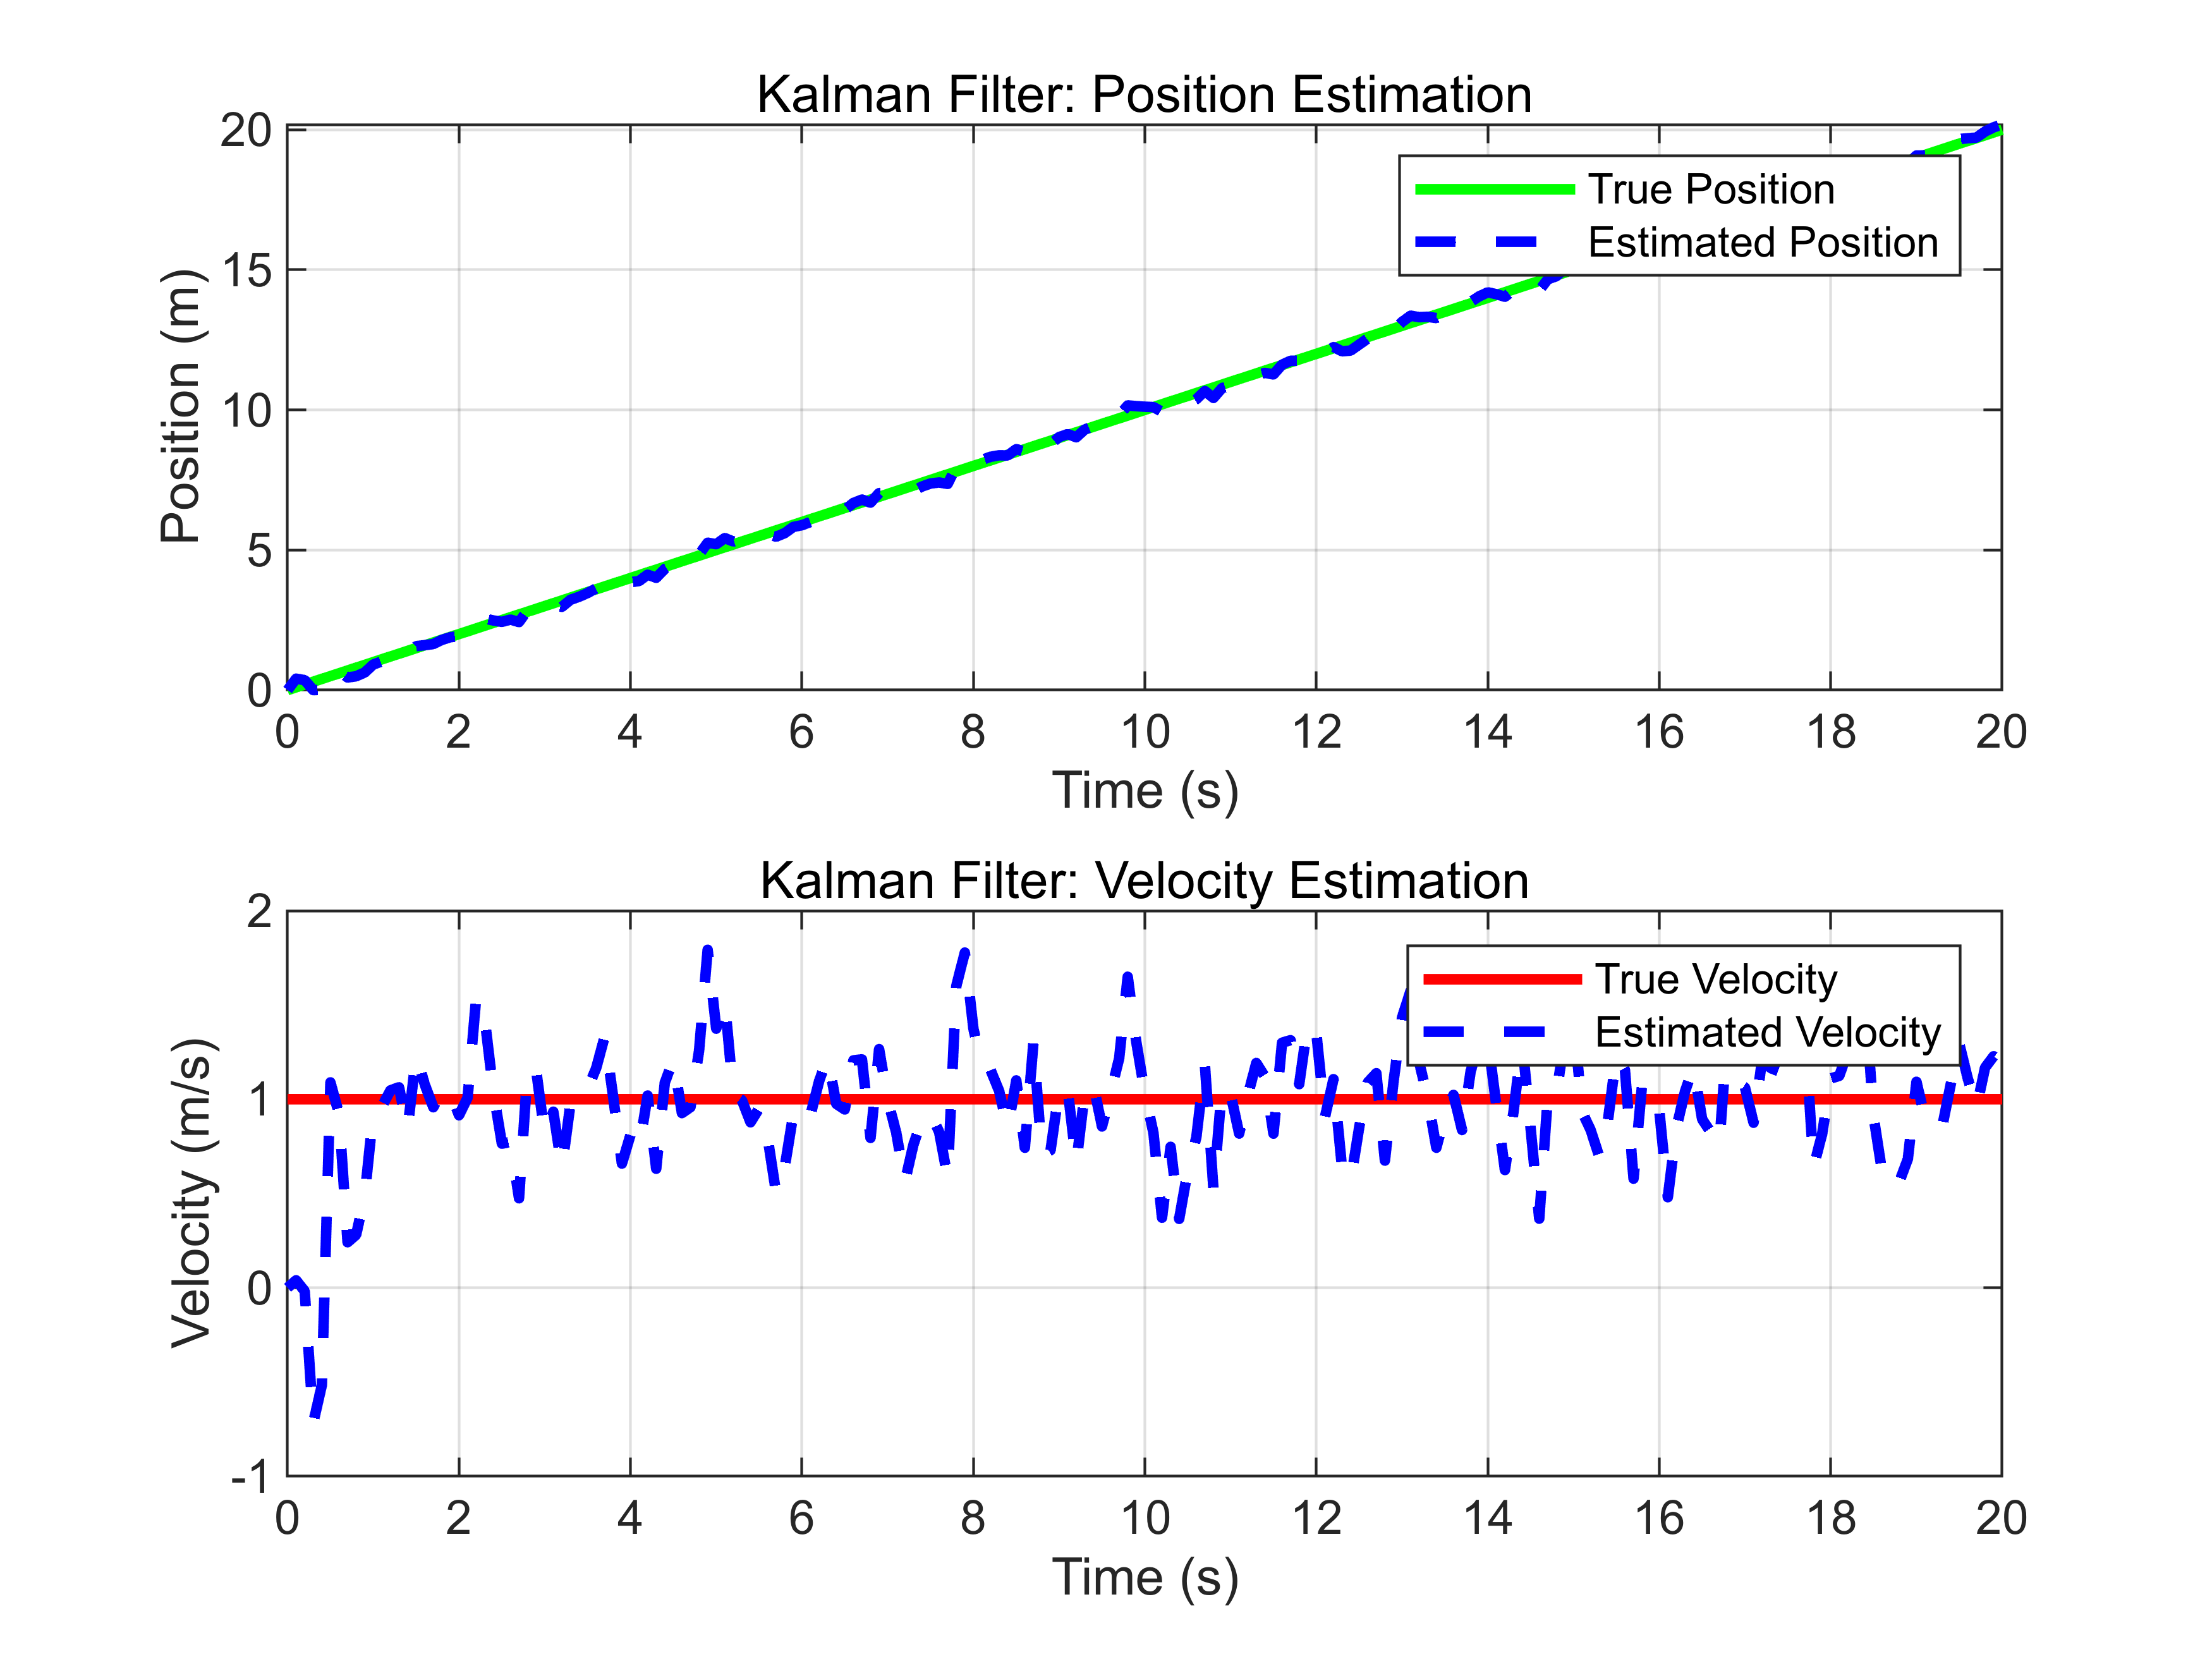

In [2]:
% Parameters
dt = 0.1;                 % Time step (0.1 seconds)
t = 0:dt:20;              % Time vector (20 seconds)
n = length(t);            % Number of time steps

% True velocity and position (assumed constant velocity)
true_velocity = 1;        % Robot moves with constant velocity of 1 m/s
true_position = true_velocity * t; % True position of the robot

% Simulated sensor measurements (acceleration) with noise
acceleration_noise_variance = 0.01;  % Variance of the acceleration noise
measured_acceleration = true_velocity + sqrt(acceleration_noise_variance) * randn(size(t));

% Kalman filter parameters
A = [1 dt; 0 1];          % State transition matrix (position and velocity)
H = [1 0];                % Measurement matrix (we only measure position)
Q = [0.01 0; 0 0.1];      % Process noise covariance (system noise)
R = 0.1;                  % Measurement noise covariance (sensor noise)
P = eye(2);               % Initial estimation error covariance
x_est = [0; 0];           % Initial state estimate [position; velocity]

% Preallocation
x_estimated = zeros(2, n);  % Store the state estimates

% Kalman filter algorithm
for k = 2:n
    % Prediction step
    x_pred = A * x_est;                % Predicted state (position, velocity)
    P_pred = A * P * A' + Q;           % Predicted error covariance

    % Measurement update step (simulate position measurement with noise)
    z_k = true_position(k) + sqrt(R) * randn;  % Noisy position measurement

    % Kalman gain calculation
    K = P_pred * H' / (H * P_pred * H' + R);

    % Update state estimate and error covariance
    x_est = x_pred + K * (z_k - H * x_pred);
    P = (eye(2) - K * H) * P_pred;

    % Store the estimate
    x_estimated(:, k) = x_est;
end

% Plotting the results
figure;
subplot(2,1,1);
plot(t, true_position, 'g', 'LineWidth', 2);  % True position
hold on;
plot(t, x_estimated(1, :), 'b--', 'LineWidth', 2);  % Estimated position
legend('True Position', 'Estimated Position');
xlabel('Time (s)');
ylabel('Position (m)');
title('Kalman Filter: Position Estimation');
grid on;

subplot(2,1,2);
plot(t, true_velocity * ones(1,n), 'r', 'LineWidth', 2);  % True velocity
hold on;
plot(t, x_estimated(2, :), 'b--', 'LineWidth', 2);  % Estimated velocity
legend('True Velocity', 'Estimated Velocity');
xlabel('Time (s)');
ylabel('Velocity (m/s)');
title('Kalman Filter: Velocity Estimation');
grid on;


**시스템 모델**: 로봇은 1차원에서 움직이며 일정한 속도로 이동합니다. 이때, 로봇의 위치와 속도를 칼만 필터로 추정합니다.


**측정값**: 가속도 센서에서 측정한 가속도 정보는 잡음이 포함된 상태로 주어집니다.


**칼만 필터 파라미터**:

-  **A**: 상태 전이 행렬(위치와 속도).
-  **H**: 측정 행렬(위치만 측정).
-  **Q**: 시스템 잡음 공분산(프로세스 잡음).
-  **R**: 측정 잡음 공분산(센서 잡음).

**알고리즘**:

-  **예측 단계**: 현재 상태와 오차 공분산을 바탕으로 다음 상태를 예측합니다.
-  **업데이트 단계**: 측정값을 바탕으로 상태 추정치를 갱신하고 오차 공분산을 업데이트합니다.

-  실제 위치(초록색), 추정된 위치(파란색), 실제 속도(빨간색), 추정된 속도(파란색)을 그래프로 표현합니다.

**결과 분석**

-  칼만 필터는 로봇의 위치와 속도를 시간에 따라 매우 정확하게 추정합니다. 초기에 추정 오차가 있을 수 있지만, 시간이 지남에 따라 점점 더 정확한 추정치를 얻습니다.
-  노이즈가 포함된 가속도 센서의 측정값을 기반으로 하여 로봇의 실제 위치와 속도를 필터링하여 얻어낼 수 있습니다.
#### 항공기 추적의 레이더 데이터 기반 위치 속도 추정사례:노이즈 제거

**시나리오:**

-  레이더를 통해 항공기의 위치를 2차원 평면에서 추적하고, 해당 위치에 노이즈가 포함되어 있습니다.
-  칼만 필터를 사용하여 항공기의 위치와 속도를 정확하게 추정합니다.

**시스템 모델:**

-  **상태 벡터**: 항공기의 $x$ -축과 $y$ \-축에서의 위치와 속도.
-  **측정값**: 레이더에서 측정한 항공기의 위치 (잡음 포함).
-  **잡음**: 시스템(프로세스) 노이즈와 측정 노이즈.

**상태 공간 모델:**

-  상태 전이 행렬 $A$ (2D 위치 및 속도):

 $A=$ $\left\lbrack \begin{array}{cccc} 1 & 0 & \mathrm{dt} & 0\newline 0 & 1 & 0 & \mathrm{dt}\newline 0 & 0 & 1 & 0\newline 0 & 0 & 0 & 1 \end{array}\right\rbrack$ ​​

-  위치는 시간 변화에 따라 속도로 업데이트됩니다.

-  측정 행렬 $H$ (레이더에서 위치 측정):

$$H=$$
$$\left\lbrack \begin{array}{cccc} 1 & 0 & 0 & 0\newline 0 & 1 & 0 & 0 \end{array}\right\rbrack$$

-  레이더는 $x$ -축과 $y$ -축에서의 위치만 측정할 수 있습니다.


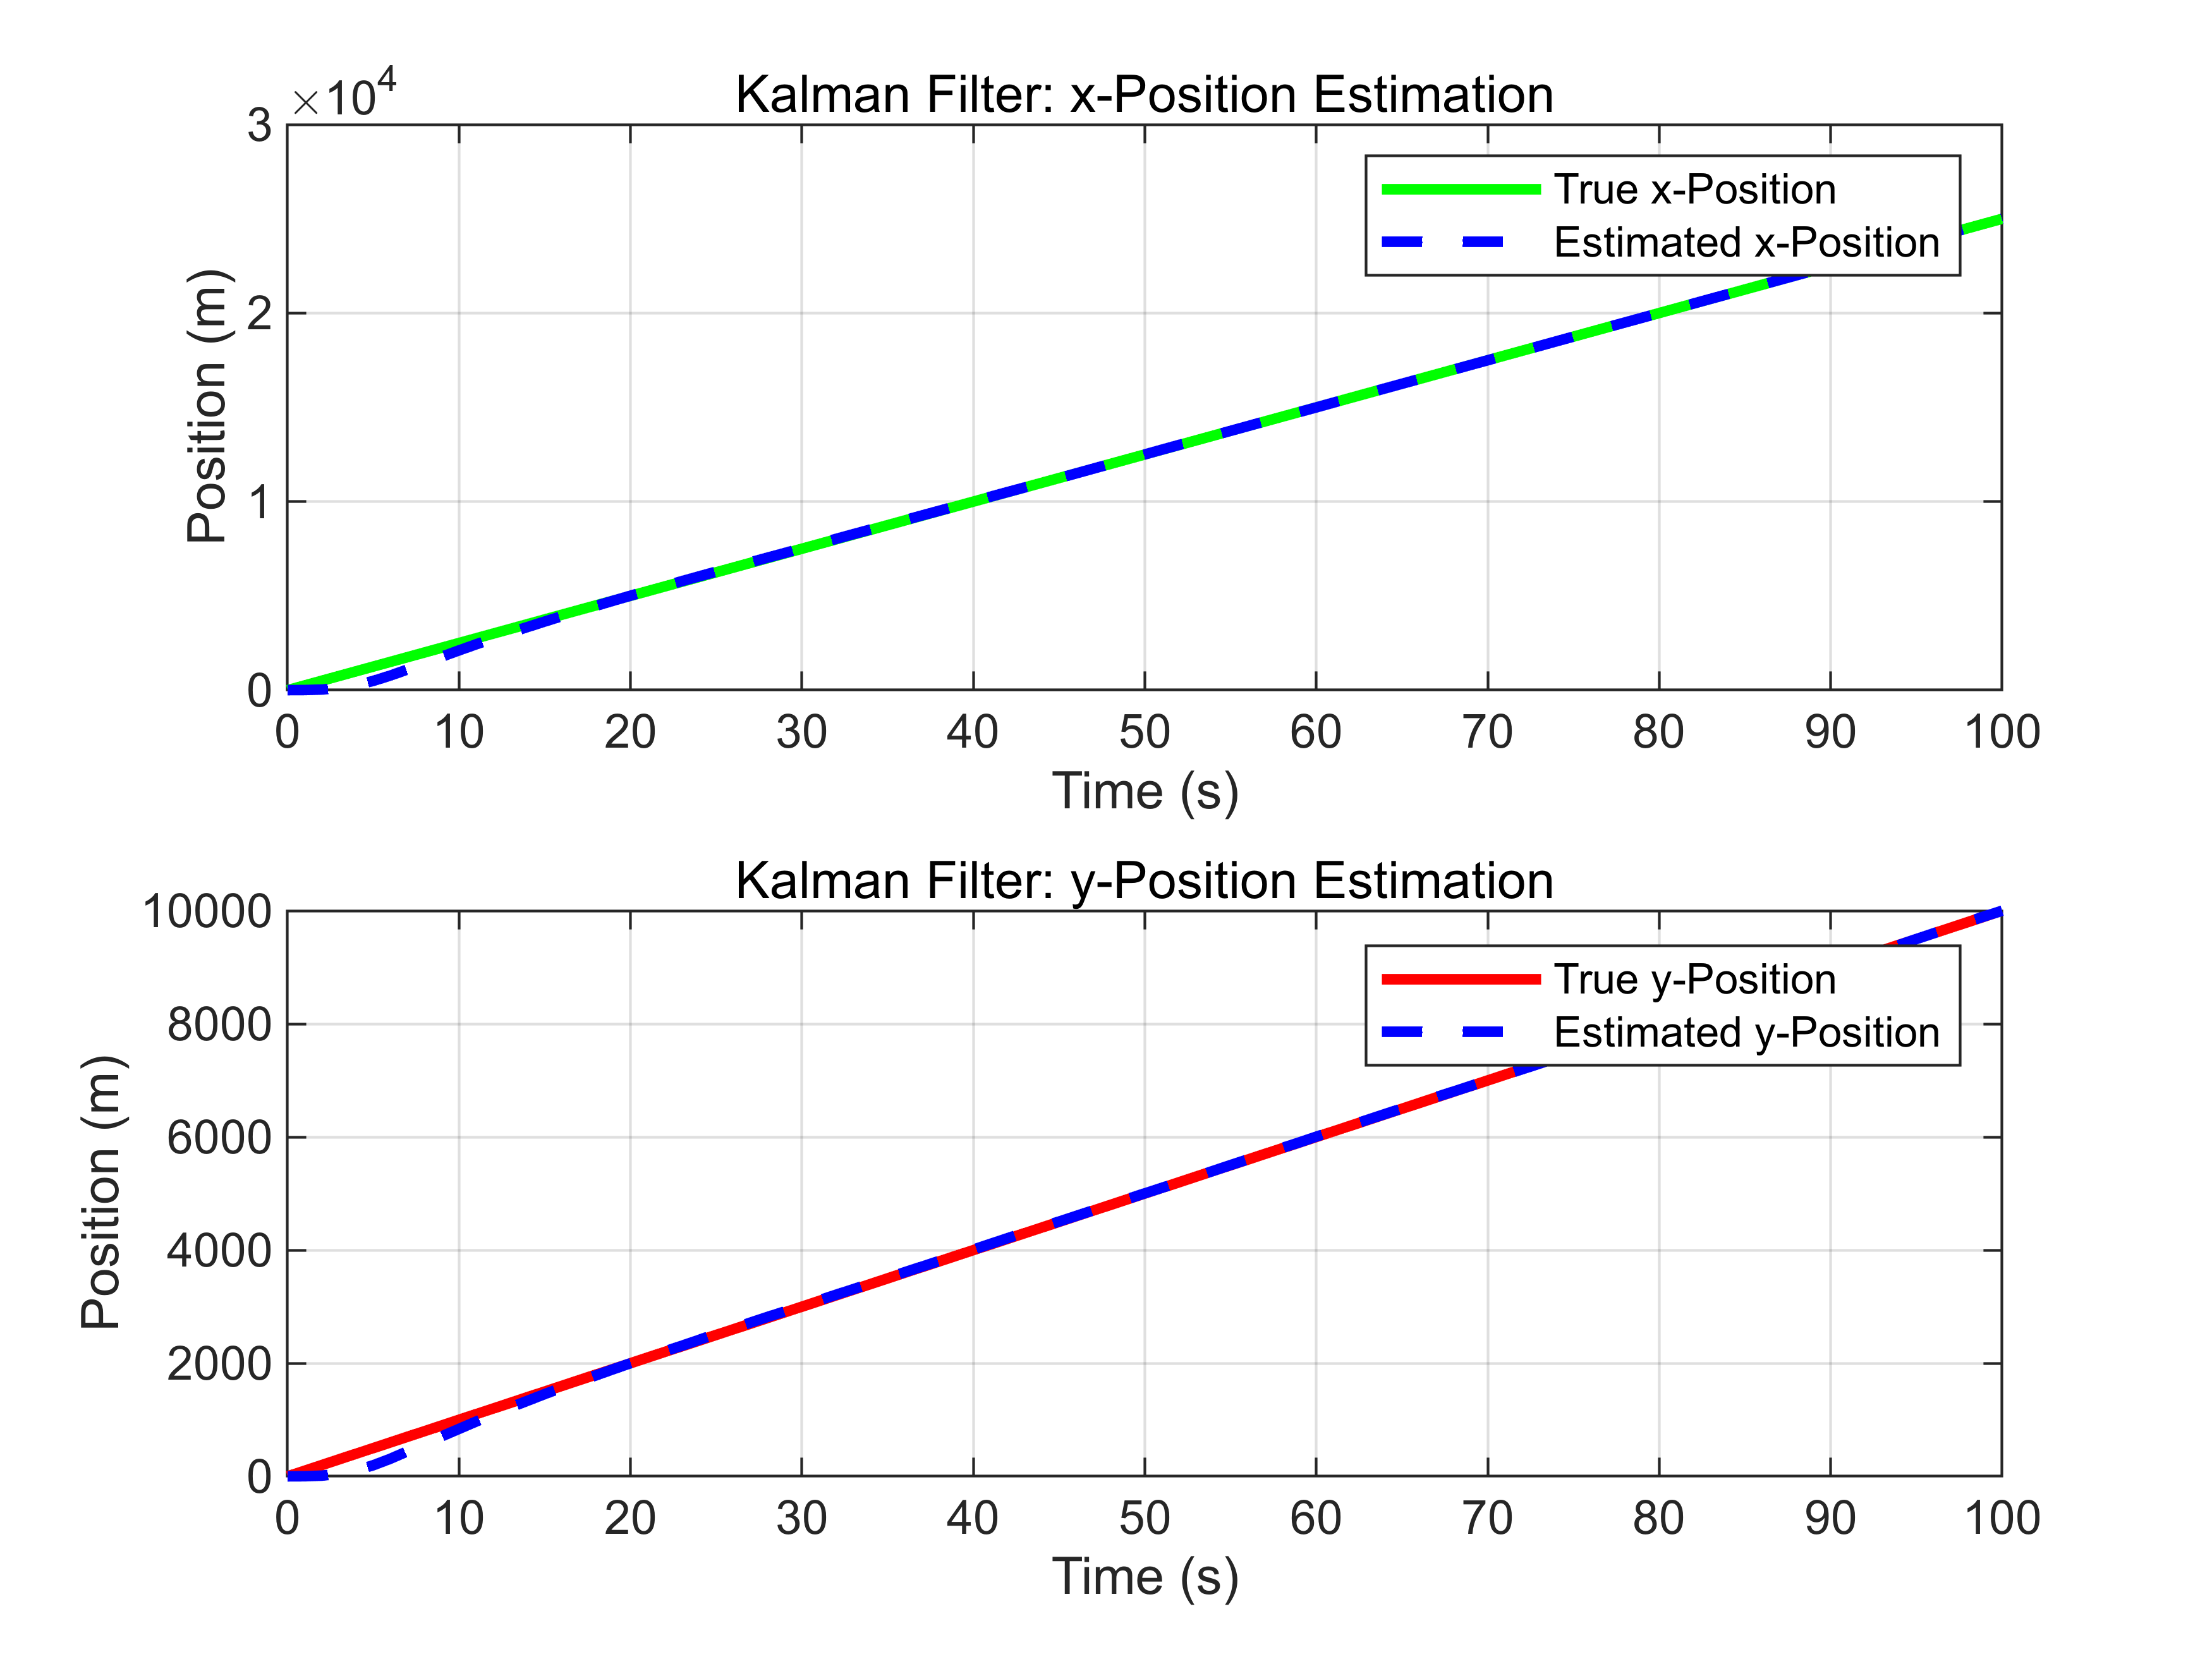

In [3]:
% Parameters
dt = 1;                 % Time step (1 second)
t = 0:dt:100;           % Time vector (100 seconds)
n = length(t);          % Number of time steps

% True velocity and position (assumed constant velocity)
true_velocity = [250; 100]; % Constant velocity in x and y direction [m/s]
true_position = [0; 0] + true_velocity * t; % True position over time

% Simulated radar measurements (with noise)
measurement_noise_variance = 100;  % Variance of the radar measurement noise
measured_position = true_position + sqrt(measurement_noise_variance) * randn(2, n);

% Kalman filter parameters
A = [1 0 dt 0; 0 1 0 dt; 0 0 1 0; 0 0 0 1];  % State transition matrix
H = [1 0 0 0; 0 1 0 0];  % Measurement matrix (we only measure position)
Q = [0.1 0 0 0; 0 0.1 0 0; 0 0 0.1 0; 0 0 0 0.1];  % Process noise covariance
R = measurement_noise_variance * eye(2);  % Measurement noise covariance
P = eye(4);  % Initial estimation error covariance
x_est = [0; 0; 0; 0];  % Initial state estimate [x_position; y_position; x_velocity; y_velocity]

% Preallocate for storing estimated states
x_estimated = zeros(4, n);

% Kalman filter algorithm
for k = 2:n
    % Prediction step
    x_pred = A * x_est;                  % Predicted state
    P_pred = A * P * A' + Q;             % Predicted error covariance

    % Measurement update step (simulate radar measurement with noise)
    z_k = measured_position(:, k);  % Noisy radar position measurement

    % Kalman gain calculation
    K = P_pred * H' / (H * P_pred * H' + R);

    % Update state estimate and error covariance
    x_est = x_pred + K * (z_k - H * x_pred);  % Updated state estimate
    P = (eye(4) - K * H) * P_pred;            % Updated error covariance

    % Store the estimate
    x_estimated(:, k) = x_est;
end

% Plotting the results
figure;
subplot(2,1,1);
plot(t, true_position(1,:), 'g', 'LineWidth', 2);  % True x-position
hold on;
plot(t, x_estimated(1, :), 'b--', 'LineWidth', 2);  % Estimated x-position
legend('True x-Position', 'Estimated x-Position');
xlabel('Time (s)');
ylabel('Position (m)');
title('Kalman Filter: x-Position Estimation');
grid on;

subplot(2,1,2);
plot(t, true_position(2,:), 'r', 'LineWidth', 2);  % True y-position
hold on;
plot(t, x_estimated(2, :), 'b--', 'LineWidth', 2);  % Estimated y-position
legend('True y-Position', 'Estimated y-Position');
xlabel('Time (s)');
ylabel('Position (m)');
title('Kalman Filter: y-Position Estimation');
grid on;


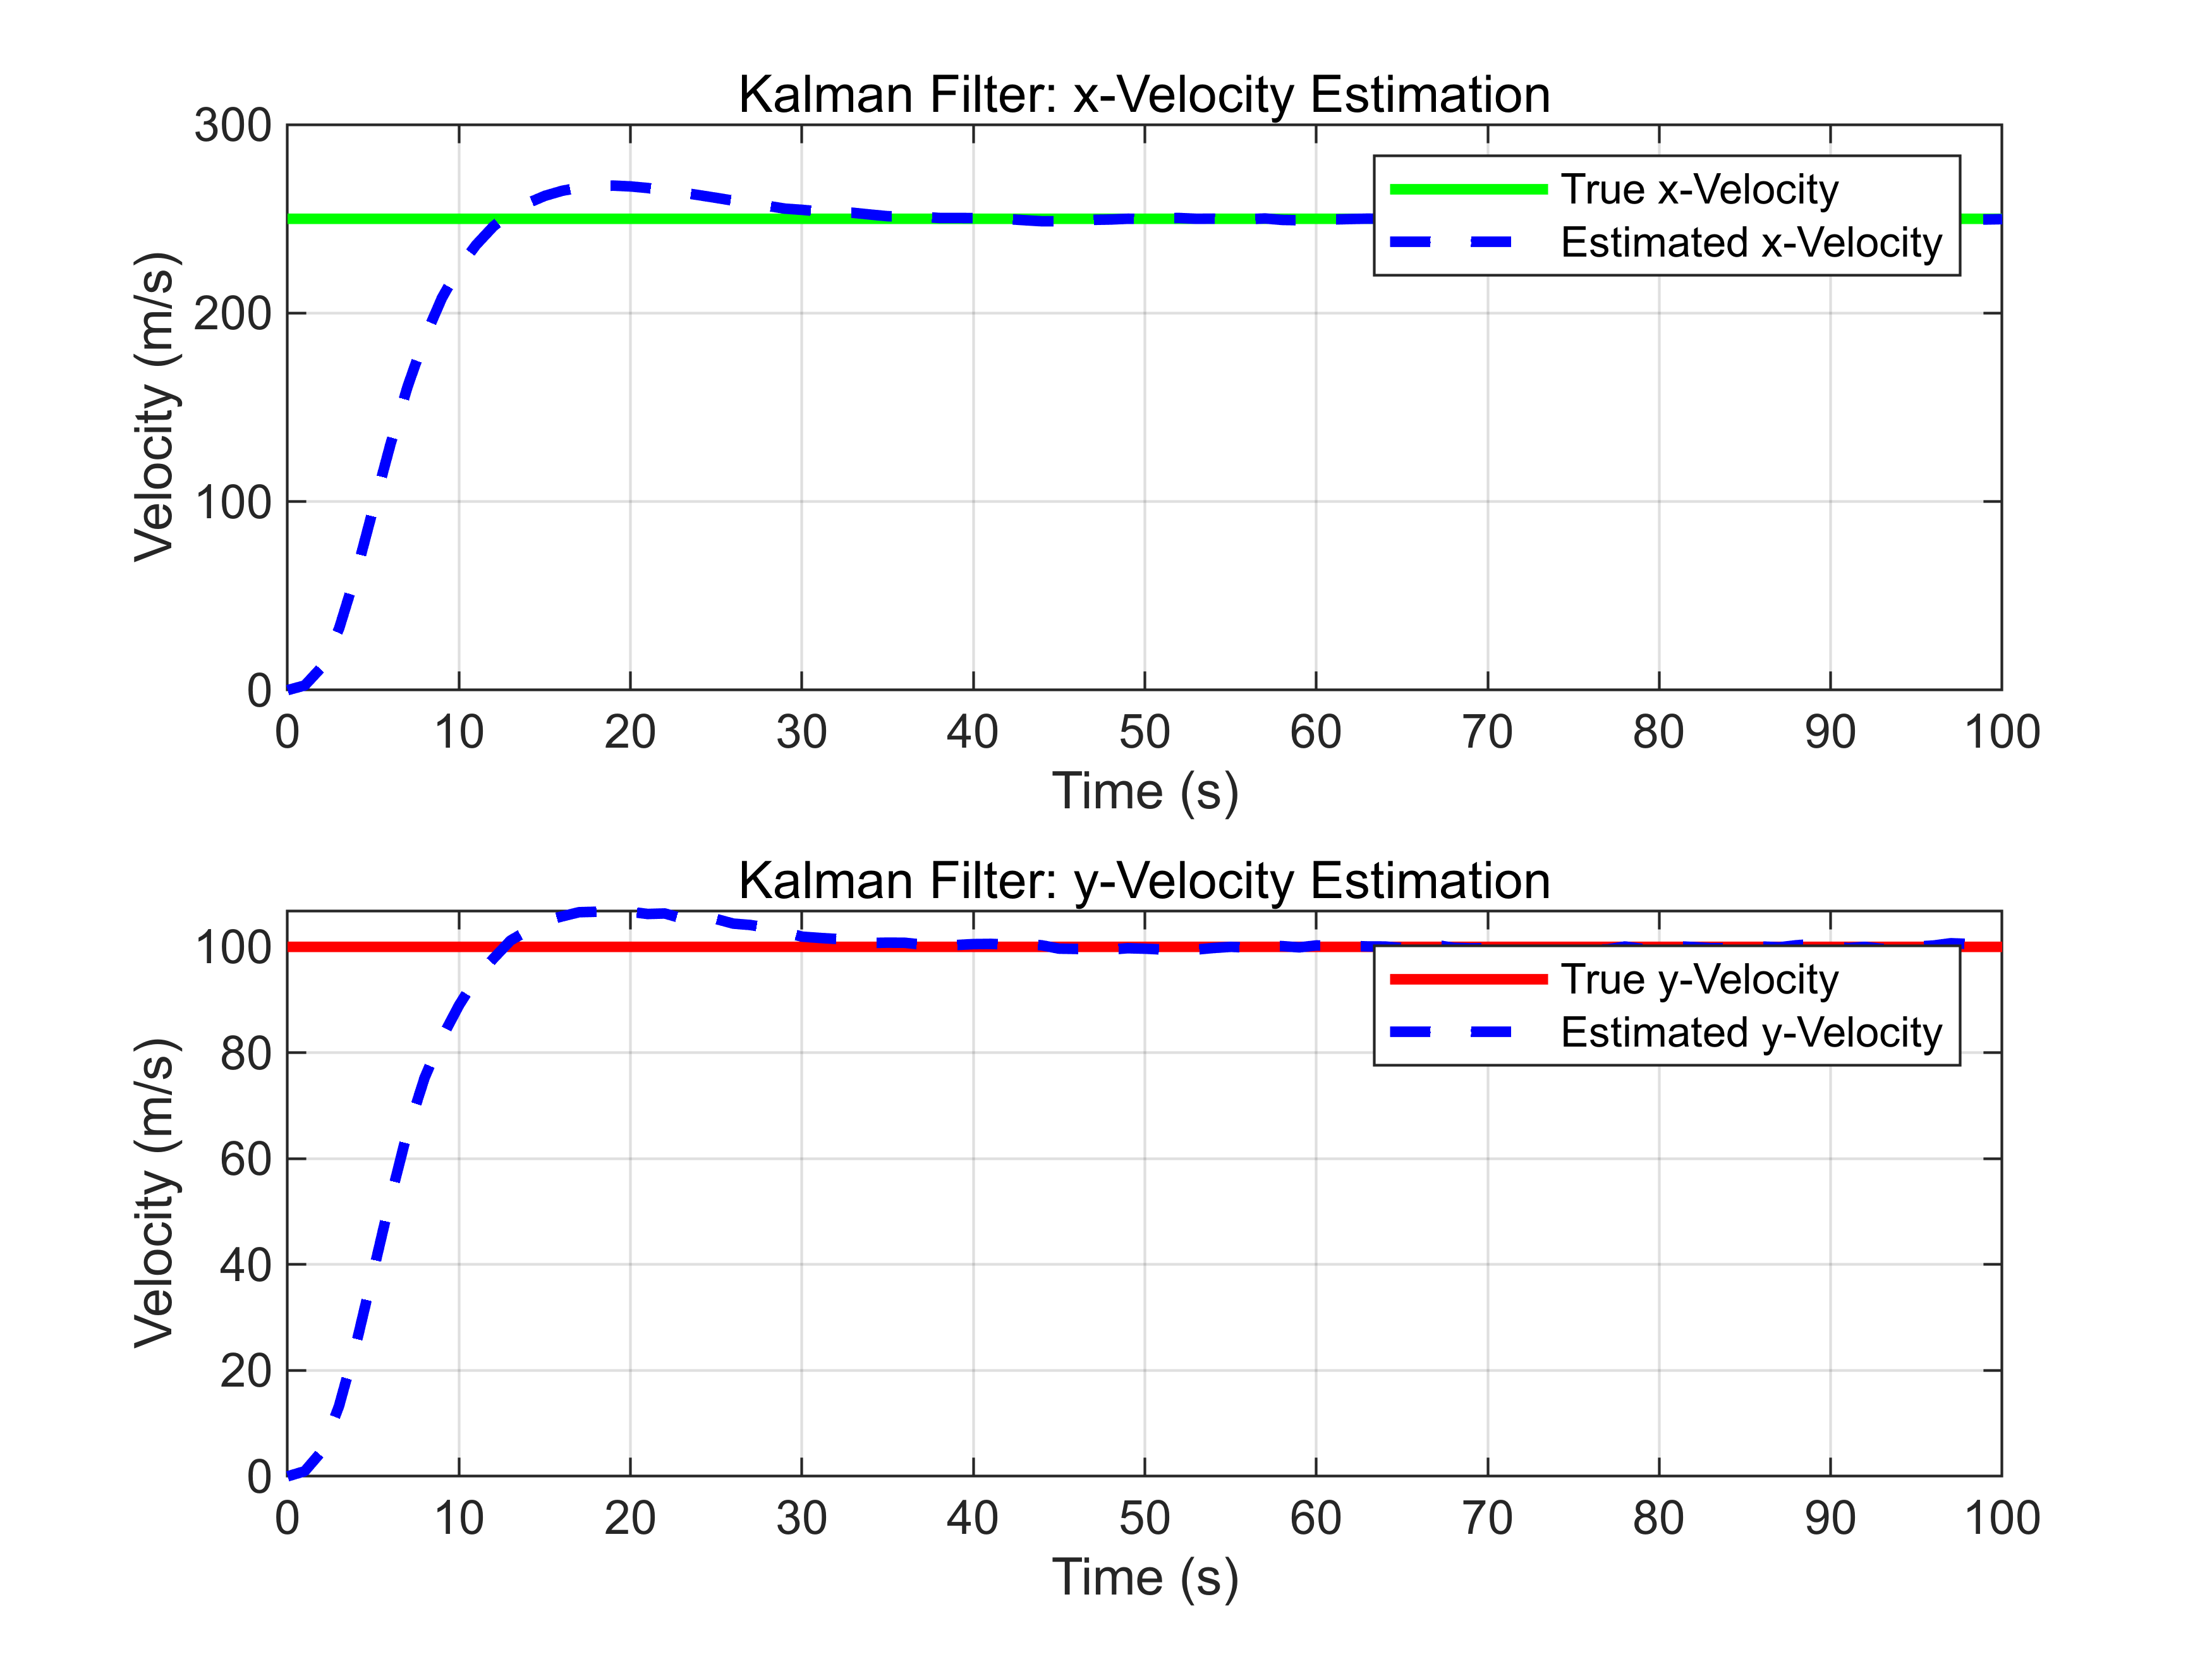

In [4]:

% Plot velocity estimation
figure;
subplot(2,1,1);
plot(t, true_velocity(1) * ones(1,n), 'g', 'LineWidth', 2);  % True x-velocity
hold on;
plot(t, x_estimated(3, :), 'b--', 'LineWidth', 2);  % Estimated x-velocity
legend('True x-Velocity', 'Estimated x-Velocity');
xlabel('Time (s)');
ylabel('Velocity (m/s)');
title('Kalman Filter: x-Velocity Estimation');
grid on;

subplot(2,1,2);
plot(t, true_velocity(2) * ones(1,n), 'r', 'LineWidth', 2);  % True y-velocity
hold on;
plot(t, x_estimated(4, :), 'b--', 'LineWidth', 2);  % Estimated y-velocity
legend('True y-Velocity', 'Estimated y-Velocity');
xlabel('Time (s)');
ylabel('Velocity (m/s)');
title('Kalman Filter: y-Velocity Estimation');
grid on;


**시스템 모델**: 항공기의 2차원 위치와 속도를 칼만 필터로 추정합니다. 여기서 시간마다 항공기의 위치와 속도를 추정합니다.


**측정값**: 레이더가 추적한 항공기의 위치 데이터를 사용합니다. 이 측정값은 잡음이 포함되어 있습니다.


**칼만 필터 파라미터**:

-  **A**: 상태 전이 행렬 (항공기의 위치와 속도).
-  **H**: 측정 행렬 (레이더는 위치만 측정).
-  **Q**: 시스템 잡음 공분산 (프로세스 잡음).
-  **R**: 측정 잡음 공분산 (레이더 노이즈).

**알고리즘**:

-  **예측 단계**: 현재 상태와 오차 공분산을 바탕으로 다음 상태를 예측합니다.
-  **업데이트 단계**: 레이더로부터 받은 측정값을 기반으로 상태 추정치를 갱신하고 오차 공분산을 업데이트합니다.

-  실제 위치와 추정된 위치, 실제 속도와 추정된 속도를 그래프로 표현합니다.

**결과 분석**

-  칼만 필터는 항공기의 실제 위치와 속도를 시간에 따라 추정합니다. 레이더 측정값에 잡음이 포함되어 있지만, 필터는 이러한 노이즈를 제거하여 정확한 추정치를 제공합니다.
-  시간이 지나면서 필터는 항공기의 실제 위치와 속도를 매우 정확하게 추정합니다.
#### 경제 데이터 분석의 GDP 성장률 분석사례:노이즈 제거

**가정 시나리오:**

-  **GDP 성장률**에 노이즈가 포함되어 있는 시계열 데이터가 주어져 있고, 이를 기반으로 경제 추세를 추정하려고 합니다.
-  칼만 필터를 사용해 매 분기마다 추정된 GDP 성장률을 추정하고, 필터링된 데이터를 통해 경제의 장기적인 변화를 파악합니다.

**시스템 모델:**

-  **상태 벡터**: GDP 성장률.
-  **측정값**: 실제로 측정된 노이즈가 포함된 GDP 성장률 데이터.
-  **잡음**: 시스템(프로세스) 노이즈와 측정 노이즈.

**상태 공간 모델:**

-  상태 전이 행렬 $A$ : 시간에 따라 상태(성장률)가 크게 변하지 않는다고 가정 (자체 상수로 상태가 유지됨): $A=1$ 즉, 성장률은 전 시기의 상태에서 크게 벗어나지 않는다고 가정합니다.
-  측정 행렬 $H$ : 측정은 상태 자체를 그대로 반영: $H=1$ 측정값은 실제 성장률에 직접적으로 반영됩니다.

In [5]:
% Parameters
dt = 1;                      % Time step (quarter)
n = 100;                     % Number of quarters (25 years of data)

% True GDP growth rate (constant for simplicity, but can vary)
true_growth_rate = 2.5 * ones(1, n); % True GDP growth rate (%)

% Simulated noisy measurements (e.g., due to measurement errors)
measurement_noise_variance = 0.5;   % Variance of measurement noise
measured_growth_rate = true_growth_rate + sqrt(measurement_noise_variance) * randn(1, n);

% Kalman filter parameters
A = 1;  % State transition matrix (growth rate assumed to change minimally)
H = 1;  % Measurement matrix (we measure growth rate directly)
Q = 0.01;  % Process noise covariance (small)
R = measurement_noise_variance;  % Measurement noise covariance
P = 1;  % Initial estimation error covariance
x_est = 0;  % Initial state estimate (GDP growth rate)

% Preallocate for storing estimated growth rates
x_estimated = zeros(1, n);

% Kalman filter algorithm
for k = 2:n
    % Prediction step
    x_pred = A * x_est;                  % Predicted state (next GDP growth rate)
    P_pred = A * P * A' + Q;             % Predicted error covariance

    % Measurement update step
    z_k = measured_growth_rate(k);  % Noisy measured GDP growth rate

    % Kalman gain calculation
    K = P_pred * H' / (H * P_pred * H' + R);

    % Update state estimate and error covariance
    x_est = x_pred + K * (z_k - H * x_pred);  % Updated state estimate
    P = (1 - K * H) * P_pred;                % Updated error covariance

    % Store the estimate
    x_estimated(k) = x_est;
end

% Plotting the results
figure;
plot(1:n, true_growth_rate, 'g', 'LineWidth', 2);  % True GDP growth rate
hold on;
plot(1:n, measured_growth_rate, 'r.', 'LineWidth', 1.5);  % Measured GDP growth rate (noisy)
plot(1:n, x_estimated, 'b--', 'LineWidth', 2);  % Estimated GDP growth rate (filtered)
legend('True Growth Rate', 'Measured (Noisy)', 'Estimated (Kalman Filter)');
xlabel('Time (Quarters)');
ylabel('GDP Growth Rate (%)');
title('Kalman Filter Applied to GDP Growth Rate Estimation');
grid on;


**시스템 모델**: GDP 성장률은 상대적으로 시간이 지나도 큰 변동이 없다고 가정하여, 상태 전이 행렬 AAA는 1로 설정됩니다.


**측정값**: 실제 GDP 성장률 측정값에 측정 잡음이 포함되어 있으며, 이를 기반으로 필터링합니다.


**칼만 필터 파라미터**:

-  **A**: 상태 전이 행렬 (GDP 성장률이 시간이 지남에 따라 크게 변하지 않는다고 가정).
-  **H**: 측정 행렬 (측정된 GDP 성장률은 실제 성장률과 직접 관련).
-  **Q**: 시스템 잡음 공분산 (프로세스 잡음).
-  **R**: 측정 잡음 공분산 (노이즈).

**알고리즘**:

-  **예측 단계**: 이전 상태와 오차 공분산을 바탕으로 다음 GDP 성장률을 예측.
-  **업데이트 단계**: 실제 측정된 노이즈가 포함된 GDP 성장률을 사용하여 추정치와 오차 공분산을 업데이트.

-  실제 성장률과 노이즈가 포함된 측정값, 그리고 칼만 필터를 통해 추정한 GDP 성장률을 그래프로 표현.

**결과 분석**

-  노이즈가 포함된 측정값이 빨간 점으로 표시됩니다. 이러한 노이즈는 실제 데이터보다 변동성이 큽니다.
-  파란색 선은 칼만 필터를 사용하여 추정된 GDP 성장률을 나타내며, 노이즈를 제거하고 실제 성장률에 더 가깝게 추정된 결과를 보여줍니다.
-  시간이 지남에 따라 칼만 필터는 노이즈를 효과적으로 제거하고 추세에 가까운 추정값을 제공합니다.
#### 주식 종가(close price)데이터 분석 사례 : 노이즈 제거

**가정 시나리오:**

-  주식 시장의 주가 데이터가 주어졌으며, 이 데이터는 노이즈가 포함되어 있습니다.
-  칼만 필터를 사용하여 주가 데이터에서 노이즈를 제거하고, 추세(장기 평균 주가)를 추정합니다.

**시스템 모델:**

-  **상태 벡터**: 주가.
-  **측정값**: 실제 측정된 주가 데이터(노이즈 포함).
-  **잡음**: 시스템(프로세스) 노이즈와 측정 노이즈.

**상태 공간 모델:**

-  상태 전이 행렬 $A$ : 주가는 시간이 지나도 이전 상태와 큰 차이가 없다고 가정합니다: $A=1$ 즉, 주가는 전 시기의 상태와 큰 차이가 없으며 비교적 연속적인 흐름을 가정합니다.
-  측정 행렬 $H$ : 측정은 주가 자체를 그대로 반영합니다: $H=1$ 측정값은 실제 주가에 직접적으로 반영됩니다.


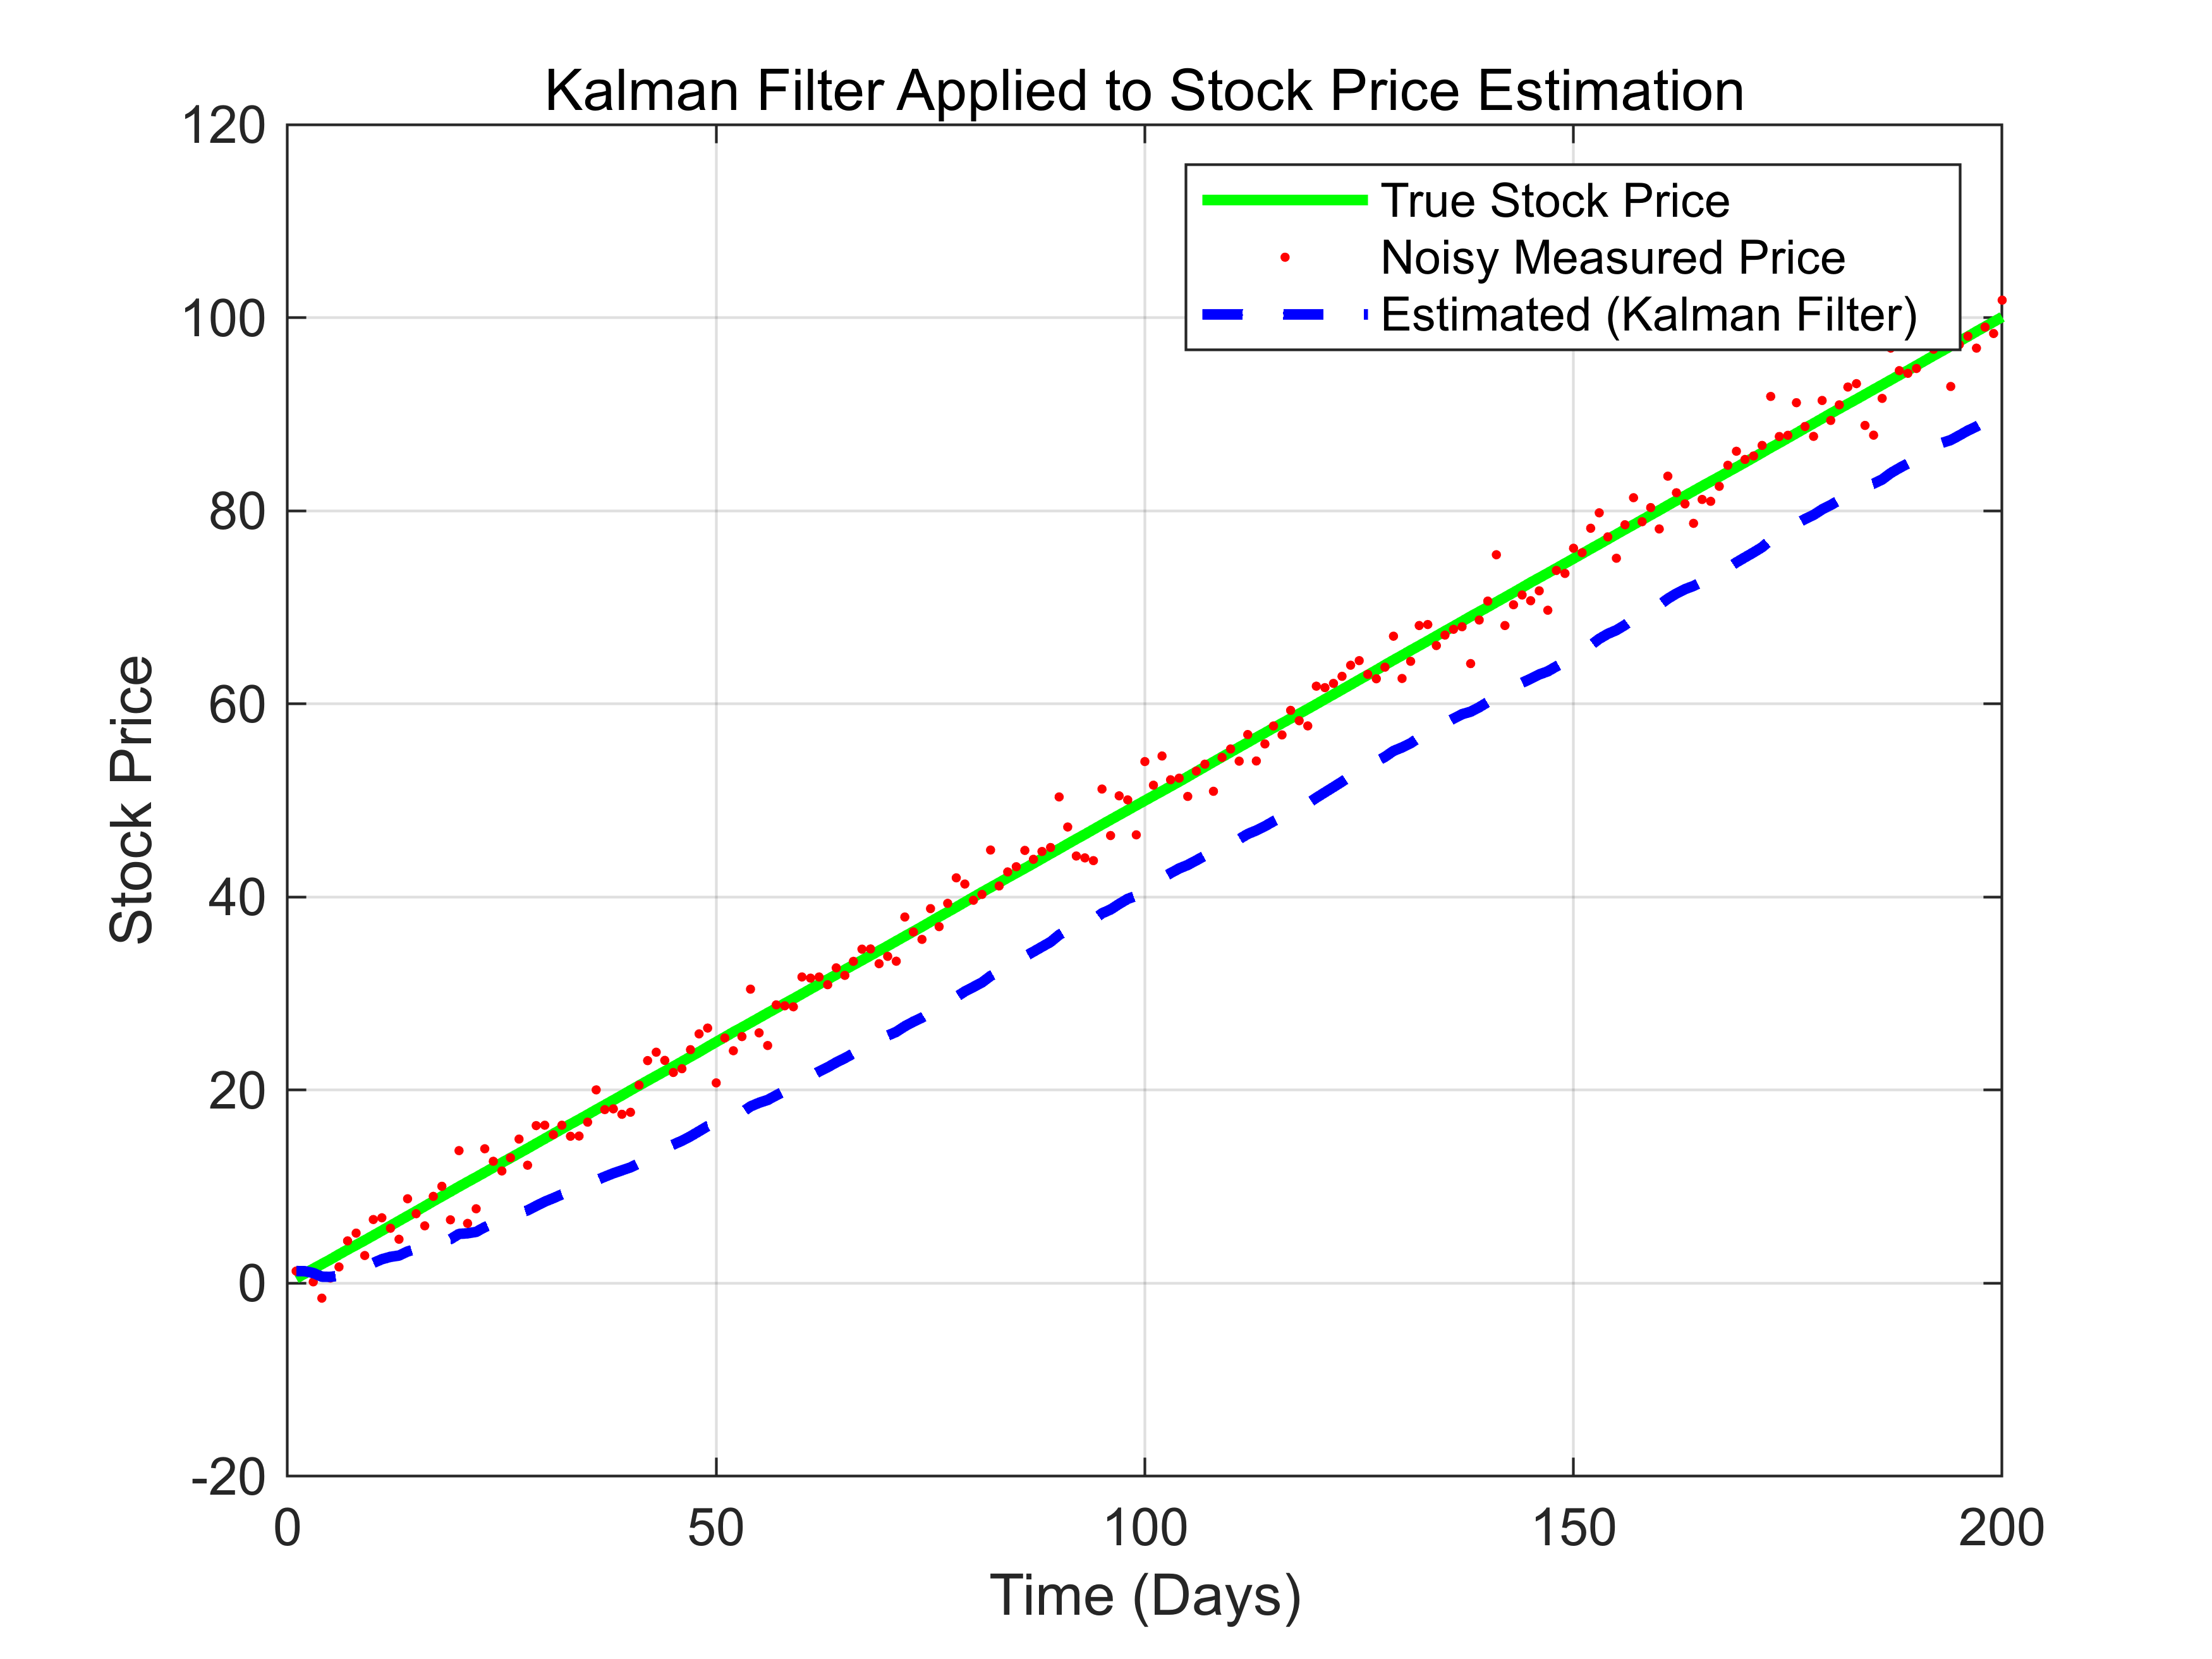

In [6]:
% Parameters
n = 200;                     % Number of data points (days)
dt = 1;                      % Time step (1 day)

% Simulated true stock prices (without noise)
true_stock_price = cumsum(0.5 + 0.01 * randn(1, n));  % Simulated upward trend

% Simulated noisy stock prices (with measurement noise)
measurement_noise_variance = 4;   % Variance of measurement noise
noisy_stock_price = true_stock_price + sqrt(measurement_noise_variance) * randn(1, n);

% Kalman filter parameters
A = 1;  % State transition matrix (price is expected to change minimally day to day)
H = 1;  % Measurement matrix (we measure price directly)
Q = 0.01;  % Process noise covariance (small, assuming small variation in actual price)
R = measurement_noise_variance;  % Measurement noise covariance (based on observation)
P = 1;  % Initial estimation error covariance
x_est = noisy_stock_price(1);  % Initial stock price estimate (first measured price)

% Preallocate array for storing estimated prices
x_estimated = zeros(1, n);
x_estimated(1) = x_est;

% Kalman filter algorithm
for k = 2:n
    % Prediction step
    x_pred = A * x_est;                  % Predicted next price
    P_pred = A * P * A' + Q;             % Predicted error covariance

    % Measurement update step
    z_k = noisy_stock_price(k);  % Noisy measured stock price

    % Kalman gain calculation
    K = P_pred * H' / (H * P_pred * H' + R);

    % Update state estimate and error covariance
    x_est = x_pred + K * (z_k - H * x_pred);  % Updated state estimate
    P = (1 - K * H) * P_pred;                % Updated error covariance

    % Store the estimate
    x_estimated(k) = x_est;
end

% Plotting the results
figure;
plot(1:n, true_stock_price, 'g', 'LineWidth', 2);  % True stock price (without noise)
hold on;
plot(1:n, noisy_stock_price, 'r.', 'LineWidth', 1.5);  % Measured stock price (with noise)
plot(1:n, x_estimated, 'b--', 'LineWidth', 2);  % Estimated stock price (filtered)
legend('True Stock Price', 'Noisy Measured Price', 'Estimated (Kalman Filter)');
xlabel('Time (Days)');
ylabel('Stock Price');
title('Kalman Filter Applied to Stock Price Estimation');
grid on;


**시스템 모델**: 주가 변동은 일반적으로 시간이 지나도 큰 변동이 없다고 가정하여 상태 전이 행렬 AAA는 1로 설정됩니다.


**측정값**: 실제 주가 데이터는 노이즈가 포함되어 있으며, 측정값을 기반으로 필터링을 진행합니다.


**칼만 필터 파라미터**:

-  **A**: 상태 전이 행렬 (주가 변동이 작다고 가정).
-  **H**: 측정 행렬 (주가는 직접적으로 측정됩니다).
-  **Q**: 프로세스 노이즈 공분산 (작은 값으로 설정하여 주가 자체는 크게 변하지 않는다고 가정).
-  **R**: 측정 노이즈 공분산 (노이즈 크기를 반영).
-  **P**: 초기 오차 공분산 (1로 설정).
-  **x\_est**: 주식 가격의 초기 추정값(첫 번째 측정값 사용).

**알고리즘**:

-  **예측 단계**: 이전 상태(주가)와 오차 공분산을 바탕으로 다음 주가를 예측합니다.
-  **업데이트 단계**: 노이즈가 포함된 주가를 사용하여 추정된 값을 업데이트하고, 오차 공분산도 업데이트합니다.

-  실제 주가(초록색 선), 노이즈가 포함된 주가(빨간 점), 칼만 필터를 사용하여 추정된 주가(파란색 점선)를 그래프로 표현합니다.

**결과 분석**

-  **실제 주가**(노이즈가 없는 값)는 초록색으로 표시됩니다.
-  **측정된 주가**는 노이즈가 포함된 데이터로, 빨간색 점으로 표시되어 있으며 변동성이 큽니다.
-  **칼만 필터로 추정된 주가**는 파란색 점선으로 표시되며, 시간이 지남에 따라 노이즈가 제거되어 추세에 더 가까운 값을 보여줍니다.
